# Problem Set 1
Due April 11th at 5:30pm -- at the start of the class so we can
discuss the solutions in class.

### Before You Start

Make sure to at least take a basic tutorial in the IPython notebook,
otherwise you'll be totally lost.  For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.



## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.


## Preliminaries

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [2]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.1.0 (need at least 1.0)
Numpy version:        1.13.3 (need at least 1.7.1)
SciPy version:        0.19.1 (need at least 0.12.0)
Pandas version:       0.20.3 (need at least 0.11.0)
Mapltolib version:     2.1.0 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


In [3]:
## Let's read the data and print some summary information
## adjust the path for your file system!
flights_df= pd.read_csv('flights.csv')

In [4]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
flights_df.dest.unique()
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
#fetching records where destination is Seattle. Origin of all records is NYC.
flights_to_sea = flights_df[flights_df.dest=='SEA']
flights_to_sea.shape

(3923, 17)

There were 3923 flights from NYC airports to Seattle in 2013

(b) How many airlines fly from NYC to Seattle?

In [7]:
print(np.unique(flights_to_sea.carrier))
len(np.unique(flights_to_sea.carrier))

['AA' 'AS' 'B6' 'DL' 'UA']


5

5 flights - AA, AS, B6, DL, UA fly from NYC to Seattle

(c) How many unique air planes fly from NYC to Seattle?

In [8]:
print(np.unique(flights_to_sea.flight))
len(np.unique(flights_to_sea.flight))

[   5    7   11   15   16   21   63   80   83  112  148  161  175  183  206
  208  214  215  217  235  237  238  250  251  252  256  263  264  267  268
  269  273  278  280  284  288  298  299  318  321  324  327  332  339  353
  364  375  382  387  404  419  436  440  441  442  443  457  469  490  495
  499  516  519  527  532  533  541  543  552  554  555  578  618  628  641
  654  671  675  676  685  726  732  738  814  816  824  842  915 1020 1025
 1043 1049 1058 1060 1072 1079 1100 1102 1108 1114 1123 1135 1149 1151 1162
 1171 1175 1192 1193 1201 1210 1211 1217 1218 1219 1236 1242 1245 1246 1281
 1288 1293 1294 1405 1416 1443 1453 1462 1465 1481 1502 1506 1515 1533 1543
 1551 1552 1562 1568 1569 1571 1577 1579 1581 1583 1593 1612 1616 1623 1630
 1635 1642 1643 1649 1654 1670 1672 1698 1709 1715 1717 1727 1771 1889 1915
 1925]


166

In [9]:
sum(pd.value_counts(flights_to_sea.tailnum.unique()))

935

166 unique airplanes fly from NYC to Seattle in terms of flights and 935 unique airplanes fly in terms of tailnum.

(d) What is the average arrival delay for flights from NC to Seattle?

In [10]:
flights_to_sea.arr_delay.mean()

-1.0990990990990992

The average arrival delay for flights from NYC to Seattle is -1.099s, ie. they arrive early on an average by 1.099s

(e) What proportion of flights to Seattle come from each NYC airport?

In [11]:
total_num_flights = len(flights_to_sea)
num_flights = pd.value_counts(flights_to_sea.origin)/total_num_flights
num_flights

JFK    0.533265
EWR    0.466735
Name: origin, dtype: float64

53.32% of the flights came from JFK airport and 46.67% of the flights came from EWR

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [12]:
# Grouping the dataset by year, month and day and calculating mean of departure and arrival delays
avg_depdelay_df = pd.DataFrame(flights_df.groupby(['year', 'month', 'day'])['dep_delay'].mean())
print(avg_depdelay_df[avg_depdelay_df.dep_delay == max(avg_depdelay_df.dep_delay)])

avg_arrdelay_df = pd.DataFrame(flights_df.groupby(['year', 'month', 'day'])['arr_delay'].mean())
print(avg_arrdelay_df[avg_arrdelay_df.arr_delay == max(avg_arrdelay_df.arr_delay)])

                dep_delay
year month day           
2013 3     8    83.536921
                arr_delay
year month day           
2013 3     8    85.862155


The maximum departure delay of 83.53s happens on 03-08-2013(8th March).
The maximum arrivay delay of 85.86s happens on 03-08-2013(8th March).

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [14]:
flights_df['date'] = pd.to_datetime(flights_df['year'] * 10000 + flights_df['month'] * 100 + flights_df['day'], format='%Y%m%d')
avg_depdelay_day =flights_df.groupby(['day'])['dep_delay'].mean()
print(avg_depdelay_day.sort_values(ascending=False).head(1))
flights_df[flights_df['dep_delay']>0].groupby(['date']).count().sort_values(by='dep_delay',ascending=False).head()

day
8    21.760773
Name: dep_delay, dtype: float64


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
date,,,,,,,,,,,,,,,,,
2013-12-23,674,674,674,674,674,674,674,673,674,674,674,674,674,673,674,674,674
2013-03-08,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653
2013-07-01,652,652,652,652,652,652,650,649,652,652,652,652,652,649,652,652,652
2013-06-25,649,649,649,649,649,649,648,647,649,649,649,649,649,647,649,649,649
2013-07-23,645,645,645,645,645,645,642,640,645,645,645,645,645,640,645,645,645


23th December has the highest number of delays and 8 March has second highest delays. However, as calculated in previous question, 8th March has maximum departure delays, its probably the worst day to fly out.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

    month  dep_delay
0       1  10.036665
1       2  10.816843
2       3  13.227076
3       4  13.938038
4       5  12.986859
5       6  20.846332
6       7  21.727787
7       8  12.611040
8       9   6.722476
9      10   6.243988
10     11   5.435362
11     12  16.576688


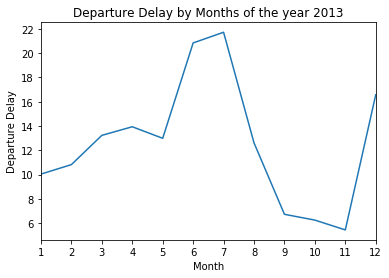

In [15]:
# To check seasonal patterns, measured the average means of departure delays across the months
avg_delay_bymonth = pd.DataFrame(flights_df.groupby(['month'])['dep_delay'].mean())
avg_delay_bymonth.reset_index(level =0, inplace = True)
print (avg_delay_bymonth)
import matplotlib.pyplot as plt
plt.plot(avg_delay_bymonth.month, avg_delay_bymonth.dep_delay)
plt.xlabel('Month')
plt.ylabel('Departure Delay')
plt.title('Departure Delay by Months of the year 2013')
plt.xticks(range(13))
plt.xlim(1,12)
plt.show()

According to the above plot, June, July and December have the maximum delays. This could be because these months are the peak times for vacations and festivals like Christmas and the demand for these flights increases then. Also, winter storms in December and hot air in June, July could be the reason.

(d) On average, how do departure delays vary over the course of a day?

       dep_delay
hour            
0.0   128.642452
1.0   207.049327
2.0   239.921875
3.0   304.727273
4.0    -5.554098
5.0    -4.355644
6.0    -1.520552
7.0     0.223289
8.0     1.091432
9.0     4.268295
10.0    5.548644
11.0    5.652309
12.0    7.601892
13.0    9.380639
14.0    8.090381
15.0   10.682049
16.0   13.621150
17.0   16.756593
18.0   18.664671
19.0   21.497342
20.0   28.266213
21.0   42.064964
22.0   68.190042
23.0   96.946865
24.0   64.862069


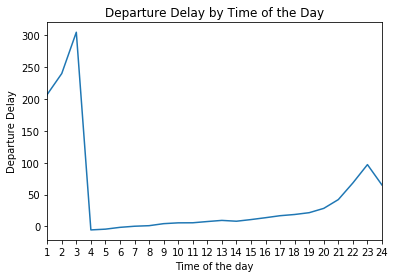

In [16]:
# Grouped the dataset by hour and calculated mean departure delay throughout the day 
depdelay_by_hr_df = pd.DataFrame(flights_df.groupby(['hour'])['dep_delay'].mean())
print (depdelay_by_hr_df)
plt.plot(depdelay_by_hr_df)
plt.xticks(range(25))
plt.xlabel('Time of the day')
plt.ylabel('Departure Delay')
plt.title('Departure Delay by Time of the Day')
plt.xlim(1, 24)
plt.show()

Departure delays are minimum and close to zero at 4am. The delays increase gradually as the day proceeds. From 23 hours or 11pm to 3am in the morning, the delays are the maximum. After 3am delays significantly drop.

## Question 3
   Which flight departing NYC in 2013 flew the fastest?

In [17]:
# calculated speed of each flight
flights_df['speed'] =  flights_df['distance']/flights_df['air_time']
print(flights_df.sort_values(by='speed', ascending=False).head(1))

        Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
216447      216448  2013      5   25    1709.0        9.0    1923.0   

        arr_delay carrier tailnum  flight origin dest  air_time  distance  \
216447      -14.0      DL  N666DN    1499    LGA  ATL      65.0       762   

        hour  minute       date      speed  
216447  17.0     9.0 2013-05-25  11.723077  


Flight 1499, Tailnum N666DN, carrier DL flew the fastest

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [18]:
# Grouped the dataset by carrier, flight and dest and counted the number of days each flight took off. Displayed those records
# where number of days = 365 
grouped_by_flight_df = pd.DataFrame(flights_df.groupby([flights_df.carrier,flights_df.flight, flights_df.dest]).count())
grouped_by_flight_df[grouped_by_flight_df.day==365]

Unnamed: 0  year  month  day  dep_time  dep_delay  \
carrier flight dest                                                      
AA      59     SFO          365   365    365  365       359        359   
        119    LAX          365   365    365  365       361        361   
        181    LAX          365   365    365  365       363        363   
        1357   SJU          365   365    365  365       364        364   
        1611   MIA          365   365    365  365       360        360   
B6      219    CLT          365   365    365  365       363        363   
        359    BUR          365   365    365  365       364        364   
        371    FLL          365   365    365  365       359        359   
        431    SRQ          365   365    365  365       362        362   
        703    SJU          365   365    365  365       364        364   
        1783   MCO          365   365    365  365       365        365   
DL      2159   MCO          365   365    365  365       364        364   
        2391   TPA          365   365    365  365       360        360   
EV      5712   IAD          365   365    365  365       351        351   
UA      15     HNL          365   365    365  365       363        363   
VX      251    LAS          365   365    365  365       364        364   
        407    LAX          365   365    365  365       364        364   
        413    LAX          365   365    365  365       362        362   

                     arr_time  arr_delay  tailnum  origin  air_time  distance  \
carrier flight dest                                                             
AA      59     SFO        359        359      363     365       359       365   
        119    LAX        361        359      364     365       359       365   
        181    LAX        363        362      365     365       362       365   
        1357   SJU        364        363      364     365       363       365   
        1611   MIA        360        360      364     365       360       365   
B6      219    CLT        363        363      365     365       363       365   
        359    BUR        364        364      365     365       364       365   
        371    FLL        359        359      365     365       359       365   
        431    SRQ        362        361      365     365       361       365   
        703    SJU        364        364      365     365       364       365   
        1783   MCO        365        365      365     365       365       365   
DL      2159   MCO        364        364      365     365       364       365   
        2391   TPA        360        359      365     365       359       365   
EV      5712   IAD        351        351      365     365       351       365   
UA      15     HNL        363        359      363     365       359       365   
VX      251    LAS        364        364      365     365       364       365   
        407    LAX        363        363      365     365       363       365   
        413    LAX        362        360      365     365       360       365   

                     hour  minute  date  speed  
carrier flight dest                             
AA      59     SFO    359     359   365    359  
        119    LAX    361     361   365    359  
        181    LAX    363     363   365    362  
        1357   SJU    364     364   365    363  
        1611   MIA    360     360   365    360  
B6      219    CLT    363     363   365    363  
        359    BUR    364     364   365    364  
        371    FLL    359     359   365    359  
        431    SRQ    362     362   365    361  
        703    SJU    364     364   365    364  
        1783   MCO    365     365   365    365  
DL      2159   MCO    364     364   365    364  
        2391   TPA    360     360   365    359  
EV      5712   IAD    351     351   365    351  
UA      15     HNL    363     363   365    359  
VX      251    LAS    364     364   365    364  
        407    LAX    364     364   3

AA(59, 119, 181, 1357, 1611), B6(219, 359, 371, 431, 703, 1783), DL(2159, 2391), EV 5712, UA 15, VX(251, 407, 413) are the 18 flights that happen everyday. Rest of the details are listed above in the table.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


#### In 2013, which flights should a passenger consider booking for a better experience in future and which ones should they definitely avoid?

In [19]:
# Grouped dataset by carrier and calculates mean of departure delay, arrival delay and speed
q5_df = pd.DataFrame(flights_df.groupby(['carrier'])['dep_delay', 'arr_delay', 'speed'].mean())
q5_df.reset_index(level=0, inplace=True) # changing multi-level index to normal index
print (q5_df)

   carrier  dep_delay  arr_delay     speed
0       9E  16.725769   7.379669  5.757173
1       AA   8.586016   0.364291  6.957879
2       AS   5.804775  -9.930889  7.394648
3       B6  13.022522   9.457973  6.666191
4       DL   9.264505   1.644341  6.974380
5       EV  19.955390  15.796431  6.049060
6       F9  20.215543  21.920705  7.086202
7       FL  18.726075  20.115906  6.572635
8       HA   4.900585  -6.915205  8.005962
9       MQ  10.552041  10.774733  6.140047
10      OO  12.586207  11.931034  6.105335
11      UA  12.106073   3.558011  7.014730
12      US   3.782418   2.129595  5.698995
13      VX  12.869421   1.764464  7.436249
14      WN  17.711744   9.649120  6.675533
15      YV  18.996330  15.556985  5.532833


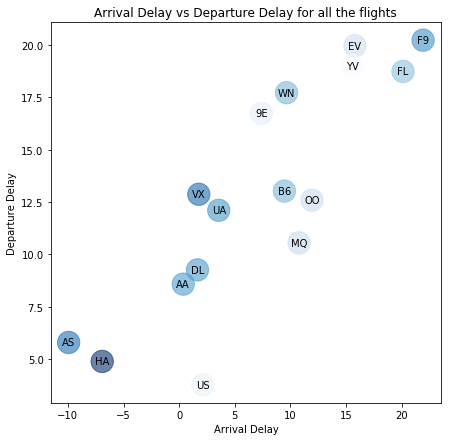

In [20]:
x = q5_df['arr_delay']
y = q5_df['dep_delay']
plt.rcParams['figure.figsize']= 7,7
plt.scatter(x, y, s=500, c = q5_df['speed'], alpha=0.6, cmap=plt.cm.Blues)
for i in range(len(q5_df)):
    plt.text(x[i], y[i], s = q5_df['carrier'].loc[i], horizontalalignment ='center', verticalalignment ='center')
plt.title('Arrival Delay vs Departure Delay for all the flights')
plt.xlabel('Arrival Delay')
plt.ylabel('Departure Delay')
plt.show()

As per the above plot, 'HA' and 'AS' have minimum departure and arrival delays, and maximum speed. Hence, passengers should look for HA or AS flights for better experience. They should definitely avoid F9 and FL as these have maximum departure and arrival delays. They should also avoid EV and YU as these have minimum speeds.

   carrier  month origin  flight
0       AS      1    EWR      62
1       AS      2    EWR      56
2       AS      3    EWR      62
3       AS      4    EWR      60
4       AS      5    EWR      62
5       AS      6    EWR      60
6       AS      7    EWR      62
7       AS      8    EWR      62
8       AS      9    EWR      60
9       AS     10    EWR      62
10      AS     11    EWR      52
11      AS     12    EWR      54
12      HA      1    JFK      31
13      HA      2    JFK      28
14      HA      3    JFK      31
15      HA      4    JFK      30
16      HA      5    JFK      31
17      HA      6    JFK      30
18      HA      7    JFK      31
19      HA      8    JFK      31
20      HA      9    JFK      25
21      HA     10    JFK      21
22      HA     11    JFK      25
23      HA     12    JFK      28


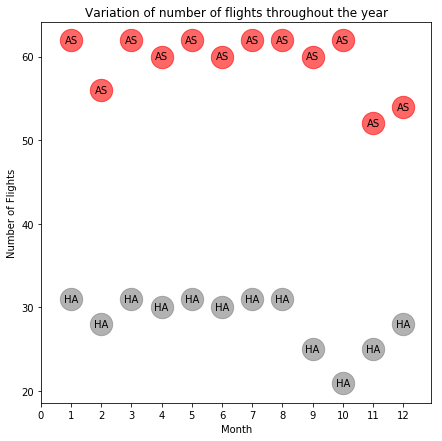

In [21]:
# Finding the number of flights of HA and AS available throughout the year
# Fetched records where carrier is HA or AS
flights_hahs_df = flights_df[np.logical_or(flights_df.carrier=='HA', flights_df.carrier=='AS')]
num_flights = pd.DataFrame(flights_hahs_df.groupby(['carrier', 'month', 'origin'])['flight'].count())
num_flights.reset_index(level = 2, inplace = True)
num_flights.reset_index(level = 1, inplace = True)
num_flights.reset_index(level = 0, inplace = True)
x1 = num_flights[num_flights.carrier=='AS'].month
y1 = num_flights[num_flights.carrier=='AS'].flight
x2 = num_flights[num_flights.carrier=='HA'].month
y2 = num_flights[num_flights.carrier=='HA'].flight
print(num_flights)
# plot for AS
plt.scatter(x1, y1, s=500, c=['Red'], alpha =0.6)
# plot for HA
plt.scatter(x2, y2, s=500, c=['Grey'], alpha =0.6)
j=0
# To display text on scatter plot
for i in range(len(num_flights)//2):
    plt.text(x1[i], y1[i], s = num_flights.carrier.loc[i], horizontalalignment ='center', verticalalignment ='center')
    j=i+1
# To display text on scatter plot
for k in range(len(num_flights)//2):
    plt.text(x2[j], y2[j], s = num_flights.carrier.loc[j], horizontalalignment ='center', verticalalignment ='center')
    j=j+1 

plt.title('Variation of number of flights throughout the year')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(range(13))
plt.show()

The number of flights of AS carrier are almost double than that of HA. Also, the number of flights are consistent throughout the year. Only for HA, number of flights in October are quite less, whereas AS flights are less in the months of November and December. Moreover, to catch the flights of AS carrier, passengers will need to board flights from EWR airport and for HA flights, they will have to board from JFK airport.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [22]:
weather_df = pd.read_csv('weather.csv.bz2')
weather_df.shape

(8719, 15)

In [23]:
weather_df.columns

Index(['Unnamed: 0', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib'],
      dtype='object')

In [24]:
weather_df.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


In [25]:
# Merging weather and flights dataset on origin, year, month, day and hour
weather_flights_df = pd.merge(flights_df, weather_df, on = ['origin', 'year','month', 'day','hour'], how='inner')
print(weather_flights_df.head())
weather_flights_df.shape

   Unnamed: 0_x  year month day  dep_time  dep_delay  arr_time  arr_delay  \
0            20  2013     1   1     601.0        1.0     844.0       -6.0   
1            23  2013     1   1     606.0       -4.0     858.0      -12.0   
2            25  2013     1   1     607.0        0.0     858.0      -17.0   
3            26  2013     1   1     608.0        8.0     807.0       32.0   
4            30  2013     1   1     615.0        0.0     833.0       -9.0   

  carrier tailnum  ...    Unnamed: 0_y   temp   dewp  humid  wind_dir  \
0      B6  N644JB  ...               6  39.02  26.06  59.37     270.0   
1      AA  N633AA  ...               6  39.02  26.06  59.37     270.0   
2      UA  N53442  ...               6  39.02  26.06  59.37     270.0   
3      MQ  N9EAMQ  ...               6  39.02  26.06  59.37     270.0   
4      DL  N326NB  ...               6  39.02  26.06  59.37     270.0   

   wind_speed  wind_gust precip  pressure  visib  
0    10.35702  11.918651    0.0    1012.0   10.

(117251, 29)

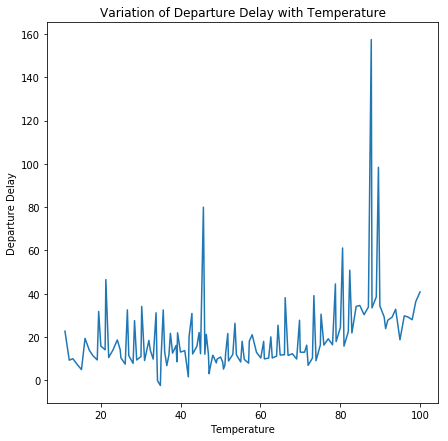

In [26]:
plt.rcParams['figure.figsize']= 7,7
weather_flights_avg_df = pd.DataFrame(weather_flights_df.groupby(['temp'])['dep_delay'].mean())
weather_flights_avg_df.reset_index(level = 0, inplace = True)
plt.plot(weather_flights_avg_df.temp, weather_flights_avg_df.dep_delay)
plt.title('Variation of Departure Delay with Temperature')
plt.xlabel('Temperature')
plt.ylabel('Departure Delay')
plt.show()

Very high temperatures around 90 causes maximum temperature delays.

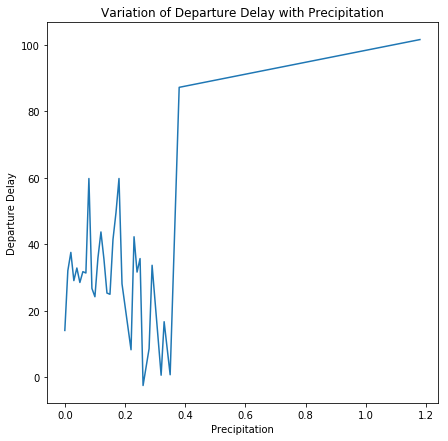

In [27]:
plt.rcParams['figure.figsize']= 7,7
weather_flights_avg_df1 = pd.DataFrame(weather_flights_df.groupby(['precip'])['dep_delay'].mean())
weather_flights_avg_df1.reset_index(level = 0, inplace = True)
plt.plot(weather_flights_avg_df1.precip, weather_flights_avg_df1.dep_delay)
plt.title('Variation of Departure Delay with Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Departure Delay')
plt.show()

Precipitation varies linearly with Departure Delay after it reaches a value of 0.4. As precipitation increases departure delays increase.

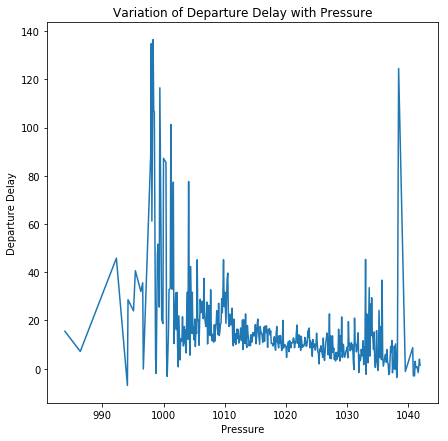

In [28]:
plt.rcParams['figure.figsize']= 7,7
weather_flights_avg_df2 = pd.DataFrame(weather_flights_df.groupby(['pressure'])['dep_delay'].mean())
weather_flights_avg_df2.reset_index(level = 0, inplace = True)
plt.plot(weather_flights_avg_df2.pressure, weather_flights_avg_df2.dep_delay)
plt.title('Variation of Departure Delay with Pressure')
plt.xlabel('Pressure')
plt.ylabel('Departure Delay')
plt.show()

High temperatures of 1000 and 1040 cause high temperature delays.

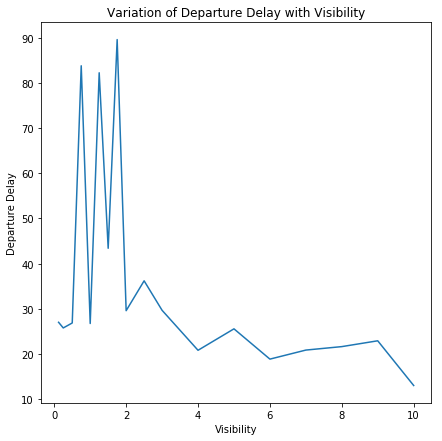

In [29]:
plt.rcParams['figure.figsize']= 7,7
weather_flights_avg_df3 = pd.DataFrame(weather_flights_df.groupby(['visib'])['dep_delay'].mean())
weather_flights_avg_df3.reset_index(level = 0, inplace = True)
plt.plot(weather_flights_avg_df3.visib, weather_flights_avg_df3.dep_delay)
plt.title('Variation of Departure Delay with Visibility')
plt.xlabel('Visibility')
plt.ylabel('Departure Delay')
plt.show()

At high visibility, departure delays are at the minimum.

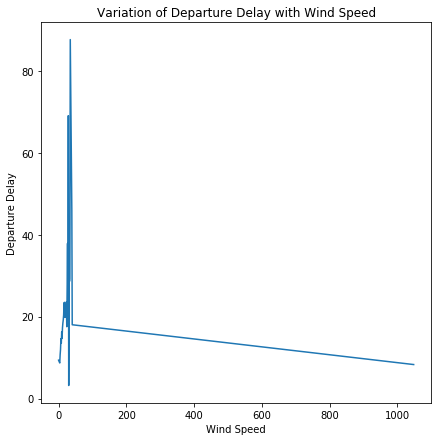

In [30]:
plt.rcParams['figure.figsize']= 7,7
weather_flights_avg_df4 = pd.DataFrame(weather_flights_df.groupby(['wind_speed'])['dep_delay'].mean())
weather_flights_avg_df4.reset_index(level = 0, inplace = True)
plt.plot(weather_flights_avg_df4.wind_speed, weather_flights_avg_df4.dep_delay)
plt.title('Variation of Departure Delay with Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Departure Delay')
plt.show()

As wind speed increases, departure delay decreases.

Concluding the results of all the visualizations: Very high temperatures around 90 causes maximum temperature delays.
Precipitation varies linearly with Departure Delay after it reaches a value of 0.4. As precipitation increases departure delays increase.
As wind speed increases, departure delays decrease.
High temperatures of 1000 and 1040 cause high departure delays.
At high visibility, departure delays are at the minimum.
As wind speed increases, departure delay decreases.